[0.09090909090909094, 0.5, 0.9090909090909091]


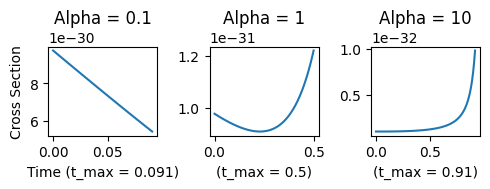

In [21]:
import numpy as np
import matplotlib.pyplot as plt

steps = 100
radius = 2.8179403262*(10**-15) #meters
mass = 510.99895 #keV
alpha_values = [0.1, 1, 10]

## This function is simply used to derive the t_max function ##
#def func_E_recoil(E_incident, alpha, theta):
#    E_recoil = E_incident / (1 + alpha*(1-np.cos(theta)))
#    return E_recoil

def Klein_Nishina(radius, mass, alpha, time):
    dSdT = ((np.pi * radius**2)/(alpha**2 * mass)) * (2 + ((time/alpha)/(1-time)**2) + time**2/(1-time) - 2*time/(alpha*(1-time)))
    return dSdT

def func_t_max(alpha, theta):
    t_max = 1 - (1/(1+(alpha*(1-np.cos(theta)))))
    return t_max

# t_max occurs at theta = np.pi/2

theta = np.pi/2
t_max_values = []
for a in alpha_values:
    t_max_values.append(func_t_max(a, theta))
print(t_max_values)


### Graphing ###


plt.figure(figsize=(5,2))

t1 = 0
t_range1 = np.linspace(0, t_max_values[0], steps)
dt1 = t_range1[1] - t_range1[0]
sols1 = []

while t1 <= t_max_values[0]+dt1:
    sols1.append(Klein_Nishina(radius, mass, alpha_values[0], t1))
    t1 += dt1

plt.subplot(1,3,1)
plt.title("Alpha = 0.1")
plt.xlabel("Time (t_max = 0.091)")
plt.ylabel("Cross Section")
plt.plot(t_range1, sols1)

t2 = 0
t_range2 = np.linspace(0, t_max_values[1], steps)
dt2 = t_range2[1] - t_range2[0]
sols2 = []

## Unsure why the t_max value for this alpha does not need the additional dt
while t2 <= t_max_values[1]:
    sols2.append(Klein_Nishina(radius, mass, alpha_values[1], t2))
    t2 += dt2

plt.subplot(1,3,2)
plt.title("Alpha = 1")
plt.xlabel("(t_max = 0.5)")
#plt.ylabel("Cross Section")
plt.plot(t_range2, sols2)

t3 = 0
t_range3 = np.linspace(0, t_max_values[2], steps)
dt3 = t_range3[1] - t_range3[0]
sols3 = []

while t3 <= t_max_values[2]+dt3:
    sols3.append(Klein_Nishina(radius, mass, alpha_values[2], t3))
    t3 += dt3

plt.subplot(1,3,3)
plt.title("Alpha = 10")
plt.xlabel("(t_max = 0.91)")
#plt.ylabel("Cross Section")
plt.plot(t_range3, sols3)


plt.tight_layout()


